In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_spotify = pd.read_csv("data/spotify_2020+.csv")
df_billboard = pd.read_csv("data/billboardCharts.csv")

In [3]:
df_spotify.head()

,Unnamed: 0.1,Unnamed: 0,title,rank,date,artist,url,region,chart,trend,streams
0,0,10000000,Negro,40,2020-04-14,J Balvin,https://open.spotify.com/track/2hsA9YWuF3C9Gos...,Costa Rica,top200,MOVE_UP,9359.0
1,1,10000001,Tutu,41,2020-04-14,"Camilo, Pedro Capó",https://open.spotify.com/track/1nocRtwyNPVtGcI...,Costa Rica,top200,MOVE_UP,9297.0
2,2,10000002,Falling,42,2020-04-14,Trevor Daniel,https://open.spotify.com/track/2rRJrJEo19S2J82...,Costa Rica,top200,MOVE_DOWN,9128.0
3,3,10000003,Quizas,43,2020-04-14,"Rich Music LTD, Sech, Dalex, Justin Quiles, Le...",https://open.spotify.com/track/5Id5B3dxJZhPcV9...,Costa Rica,top200,SAME_POSITION,9100.0
4,4,10000004,Bellaquita - Remix,44,2020-04-14,"Dalex, Lenny Tavárez, Anitta, Natti Natasha, F...",https://open.spotify.com/track/4GGwM2Krtlx9G9i...,Costa Rica,top200,SAME_POSITION,8966.0


In [4]:
df_billboard = df_billboard[df_billboard['date'] >= '2020-01-01']
df_billboard.head()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18


In [5]:
df_spotify['chart'].unique()

array(['top200', 'viral50'], dtype=object)

We have to seperate the two types of charts into seperate dataframes.

In [6]:
df_viral50 = df_spotify[df_spotify['chart'] == 'viral50']
df_viral50.shape

(2510831, 11)

In [7]:
df_top200 = df_spotify[df_spotify['chart'] == 'top200']
df_top200.shape

(8985853, 11)

# Funktions:

In [8]:
# check if region has missing ranks
def checkMissingRanks(df, region, numOfRanks):
    missing = 0
    missingList = []
    df_region = df[df['region'] == region]
    for index, val in df_region['date'].value_counts().items():
        if val < numOfRanks:
            missing = missing + (numOfRanks-val)
            #print('date:', index, ', #ranks:', val)
    if missing == 0:
        print('No missing ranks!')
    else:
        print(missing, 'missing rank entries!')

In [9]:
def checkMissingDates(df, region, start, end):
    
    df_region = df[df['region'] == region]
    
    # dates which are not in the sequence are returned
    missing = pd.date_range(start=start, end=end).difference(df_region['date'])
    
    if missing.size == 0:
        print('No missing dates!')
    else:
        print(missing.size, 'missing dates!')
        return missing

In [10]:
def checkMissingData(df, ranks):
    regions = df['region'].unique()
    
    for region in regions:
        print(region)
        missingDates = checkMissingDates(df, region, '2020-01-01', '2021-12-31')
        missingRanks = checkMissingRanks(df, region, ranks)
        print()

# Exploratory data analysis

## Viral50 (some missing data depending on country)

First we will take a look at Viral50 because this data will be used to predict the movement of positions in the Top200 Charts.

In [11]:
checkMissingData(df_viral50, 50)

Romania
No missing dates!
14 missing rank entries!

Russia
209 missing dates!
31 missing rank entries!

Saudi Arabia
No missing dates!
14 missing rank entries!

Singapore
11 missing dates!
No missing ranks!

Chile
No missing dates!
19 missing rank entries!

Colombia
No missing dates!
31 missing rank entries!

Costa Rica
No missing dates!
24 missing rank entries!

Czech Republic
No missing dates!
15 missing rank entries!

Denmark
No missing dates!
15 missing rank entries!

Dominican Republic
No missing dates!
14 missing rank entries!

Ecuador
No missing dates!
37 missing rank entries!

Egypt
No missing dates!
No missing ranks!

El Salvador
No missing dates!
17 missing rank entries!

Estonia
1 missing dates!
22 missing rank entries!

Finland
No missing dates!
14 missing rank entries!

France
No missing dates!
18 missing rank entries!

Germany
No missing dates!
33 missing rank entries!

Global
4 missing dates!
50 missing rank entries!

Greece
No missing dates!
14 missing rank entries!

Gu

Text(0, 0.5, 'Frequency')

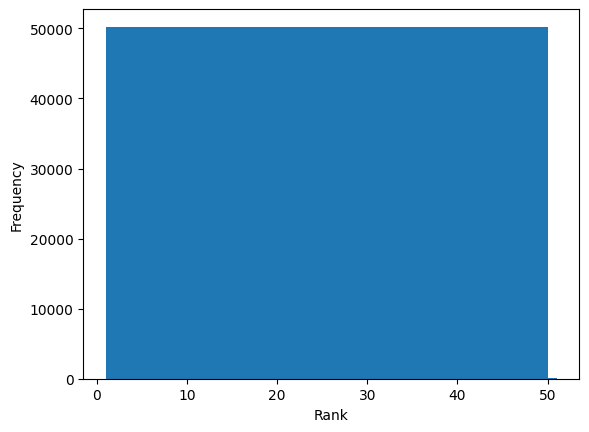

In [12]:
plt.hist(df_viral50['rank'], bins=51)
plt.xlabel("Rank")
plt.ylabel("Frequency")

In [13]:
#take a look on entries with rank > 50
df_viral50[df_viral50['rank']>50]

,Unnamed: 0.1,Unnamed: 0,title,rank,date,artist,url,region,chart,trend,streams
1492241,1492241,25000739,Lautlos,51,2021-12-11,Mario Novembre,https://open.spotify.com/track/3wyLJfkbukEpP3o...,Germany,viral50,NEW_ENTRY,NaN
1495741,1495741,25004239,Morgen/Heute,51,2021-12-12,makko,https://open.spotify.com/track/0hPzyES82xnh6Gh...,Germany,viral50,MOVE_DOWN,NaN
1496892,1496892,25005390,GHOST TOWN,51,2021-12-12,Benson Boone,https://open.spotify.com/track/135Lf4Q0CzlMNfO...,Norway,viral50,MOVE_DOWN,NaN
1499241,1499241,25007739,Mucho Gusto,51,2021-12-13,"viko63, penglord",https://open.spotify.com/track/36WlC0lGi1UEGJN...,Germany,viral50,MOVE_DOWN,NaN
1507373,1507373,25015871,Ma colombe - German Remix,51,2021-12-14,"Nej, Lune",https://open.spotify.com/track/3eHXManuHWprZC5...,Germany,viral50,NEW_ENTRY,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8820933,8820933,18964693,Leuk,51,2020-12-27,"Antoon, Big2",https://open.spotify.com/track/2z43Tcnc82QqrOC...,Netherlands,viral50,NEW_ENTRY,NaN
8828180,8828180,18972928,Adderall (Corvette Corvette),51,2020-12-27,Popp Hunna,https://open.spotify.com/track/3aAmQOxRPeKDL0H...,Sweden,viral50,NEW_ENTRY,NaN
8844372,8844372,18991675,Bassthoven,51,2020-12-28,"Kyle Exum, Shawn Wasabi",https://open.spotify.com/track/00PYMeyU91Xt0j9...,Italy,viral50,MOVE_DOWN,NaN
8846459,8846459,18993762,это ли счастье?,51,2020-12-28,Rauf & Faik,https://open.spotify.com/track/65cYA2DbCETUTyl...,Netherlands,viral50,MOVE_DOWN,NaN


Text(0, 0.5, 'Frequency')

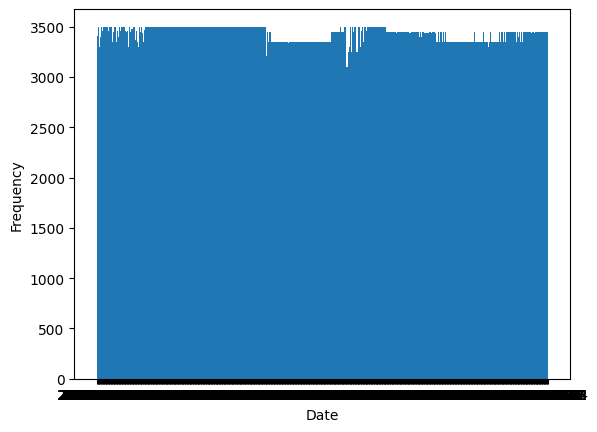

In [14]:
plt.hist(df_viral50['date'], bins=df_viral50['date'].nunique())
plt.xlabel("Date")
plt.ylabel("Frequency")

In [15]:
countryList = df_viral50['region'].unique()
countryList

array(['Romania', 'Russia', 'Saudi Arabia', 'Singapore', 'Chile',
       'Colombia', 'Costa Rica', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Finland', 'France', 'Germany', 'Global', 'Greece', 'Guatemala',
       'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico', 'Morocco',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Norway', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Slovakia', 'South Africa', 'South Korea', 'Spain', 'Sweden',
       'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Uruguay', 'Vietnam', 'Andorra', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bolivia', 'Brazil', 'Bulgaria', 'Canada'],
      dtype=object)

In [16]:
df_viral50['region'].nunique()

70

Should have 3500 entries per day because 70 regions and 50 entreis per day.
Probably some missing because of missing countries.

In [17]:
occur = df_viral50.groupby(['date','region']).size()

In [18]:
for index, val in occur.items():
    if val < 49:
        off = 49 - val
        if off != 0:
            print(index, val, off)

('2020-01-05', 'Guatemala') 48 1
('2020-02-04', 'Mexico') 46 3
('2020-02-05', 'Mexico') 46 3
('2020-02-06', 'Mexico') 44 5
('2020-02-07', 'Mexico') 44 5
('2020-02-08', 'Mexico') 44 5
('2020-02-09', 'Mexico') 44 5
('2020-02-10', 'Mexico') 43 6
('2020-02-11', 'Mexico') 43 6
('2020-02-12', 'Mexico') 42 7
('2020-07-14', 'Mexico') 47 2
('2020-07-15', 'Mexico') 47 2
('2020-07-16', 'Mexico') 47 2
('2020-07-17', 'Mexico') 46 3
('2020-07-18', 'Mexico') 47 2
('2020-07-19', 'Mexico') 47 2
('2020-07-20', 'Mexico') 47 2
('2020-10-04', 'Mexico') 48 1
('2020-10-05', 'Mexico') 48 1
('2020-10-06', 'Mexico') 48 1
('2020-10-07', 'Mexico') 47 2
('2020-10-08', 'Mexico') 46 3
('2020-10-09', 'Mexico') 46 3
('2020-10-10', 'Mexico') 45 4
('2020-10-11', 'Mexico') 45 4
('2020-10-12', 'Mexico') 46 3
('2020-10-13', 'Mexico') 45 4
('2020-10-14', 'Mexico') 43 6
('2020-10-15', 'Mexico') 43 6
('2020-10-16', 'Mexico') 43 6
('2020-10-17', 'Mexico') 43 6
('2020-10-18', 'Mexico') 42 7
('2020-10-19', 'Mexico') 41 8
('2020-

In [19]:
df_viral50.groupby(['date','region']).get_group(('2021-10-27', 'Russia'))

,Unnamed: 0.1,Unnamed: 0,title,rank,date,artist,url,region,chart,trend,streams
1728722,1728722,25295125,плачь,10,2021-10-27,"rizza, Sqwore",https://open.spotify.com/track/3yCKABoZU3FVFuy...,Russia,viral50,MOVE_DOWN,NaN
1728723,1728723,25295126,Bebra,11,2021-10-27,Klywoodjeb,https://open.spotify.com/track/0uKWzjO144VipFF...,Russia,viral50,MOVE_DOWN,NaN
1728724,1728724,25295127,No Love,12,2021-10-27,АДЛИН,https://open.spotify.com/track/03TPcM9vWUmc8y6...,Russia,viral50,SAME_POSITION,NaN
1728725,1728725,25295128,Pink Soldiers,13,2021-10-27,23,https://open.spotify.com/track/7AUCyNjckeQBBnK...,Russia,viral50,SAME_POSITION,NaN
1728726,1728726,25295129,MONEY,14,2021-10-27,LISA,https://open.spotify.com/track/7hU3IHwjX150XLo...,Russia,viral50,MOVE_UP,NaN
1728727,1728727,25295130,Capitão de Areia,15,2021-10-27,Afterclapp,https://open.spotify.com/track/0tsdTV5UgmLNGXi...,Russia,viral50,MOVE_UP,NaN
1728728,1728728,25295131,Aomine Daiki,16,2021-10-27,quiizzzmeow,https://open.spotify.com/track/5X1FYw7MXEgnPmQ...,Russia,viral50,MOVE_DOWN,NaN
1728729,1728729,25295132,Моя любовь на пятом этаже,17,2021-10-27,Sekret,https://open.spotify.com/track/4mXt7aJPDzVdWSn...,Russia,viral50,MOVE_DOWN,NaN
1728730,1728730,25295133,MIDDLE OF THE NIGHT,18,2021-10-27,Elley Duhé,https://open.spotify.com/track/58HvfVOeJY7lUuC...,Russia,viral50,MOVE_UP,NaN
1728731,1728731,25295134,ТОЛПЫ КРИЧАТ,19,2021-10-27,"uniqe, nkeeei, ARTEM SHILOVETS",https://open.spotify.com/track/3mcw4dkjfzj5B4A...,Russia,viral50,MOVE_DOWN,NaN


Dataset looks to have no critical missing data in regards to rank and date.
Except some regions have missing ranks on certain days.

## Top200 (some missing data depending on country)

In [20]:
checkMissingData(df_top200, 200)

Costa Rica
31 missing dates!
No missing ranks!

Czech Republic
31 missing dates!
No missing ranks!

Egypt
31 missing dates!
21989 missing rank entries!

Israel
31 missing dates!
No missing ranks!

Bolivia
No missing dates!
No missing ranks!

Italy
31 missing dates!
No missing ranks!

Brazil
No missing dates!
64 missing rank entries!

Japan
31 missing dates!
No missing ranks!

Latvia
32 missing dates!
61562 missing rank entries!

Bulgaria
14 missing dates!
67049 missing rank entries!

Canada
16 missing dates!
No missing ranks!

Denmark
31 missing dates!
No missing ranks!

Dominican Republic
31 missing dates!
4 missing rank entries!

Ecuador
31 missing dates!
No missing ranks!

Lithuania
31 missing dates!
46762 missing rank entries!

Chile
32 missing dates!
No missing ranks!

Malaysia
31 missing dates!
No missing ranks!

Mexico
31 missing dates!
No missing ranks!

Colombia
31 missing dates!
No missing ranks!

Morocco
31 missing dates!
16594 missing rank entries!

Netherlands
32 missing d

Text(0, 0.5, 'Frequency')

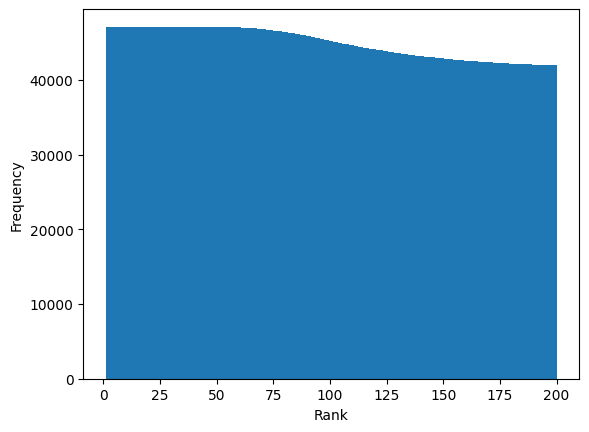

In [21]:
plt.hist(df_top200['rank'], bins=200)
plt.xlabel("Rank")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

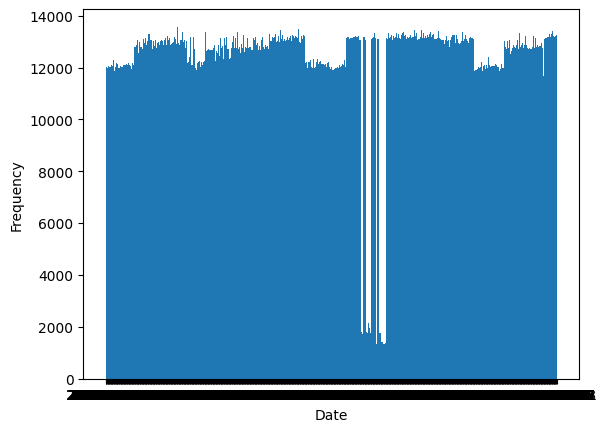

In [22]:
plt.hist(df_top200['date'], bins=df_top200['date'].nunique())
plt.xlabel("Date")
plt.ylabel("Frequency")

## Billboard (No missing data but only goes to date 2021-11-06)

In [23]:
df_billboard['date'].unique()

array(['2021-11-06', '2021-10-30', '2021-10-23', '2021-10-16',
       '2021-10-09', '2021-10-02', '2021-09-25', '2021-09-18',
       '2021-09-11', '2021-09-04', '2021-08-28', '2021-08-21',
       '2021-08-14', '2021-08-07', '2021-07-31', '2021-07-24',
       '2021-07-17', '2021-07-10', '2021-07-03', '2021-06-26',
       '2021-06-19', '2021-06-12', '2021-06-05', '2021-05-29',
       '2021-05-22', '2021-05-15', '2021-05-08', '2021-05-01',
       '2021-04-24', '2021-04-17', '2021-04-10', '2021-04-03',
       '2021-03-27', '2021-03-20', '2021-03-13', '2021-03-06',
       '2021-02-27', '2021-02-20', '2021-02-13', '2021-02-06',
       '2021-01-30', '2021-01-23', '2021-01-16', '2021-01-09',
       '2021-01-02', '2020-12-26', '2020-12-19', '2020-12-12',
       '2020-12-05', '2020-11-28', '2020-11-21', '2020-11-14',
       '2020-11-07', '2020-10-31', '2020-10-24', '2020-10-17',
       '2020-10-10', '2020-10-03', '2020-09-26', '2020-09-19',
       '2020-09-12', '2020-09-05', '2020-08-29', '2020-

In [24]:
#billboard charts only go until 2021-11-06
#create a list with dates of all saturdays until 2021-11-06
satList = pd.date_range(start='2020-01-01', end='2021-11-06', freq = 'W-SAT')

In [25]:
missing = satList.difference(df_billboard['date'])

if missing.size == 0:
    print('No missing dates!')
else:
    print(missing.size, 'missing dates!')

No missing dates!


Text(0, 0.5, 'Frequency')

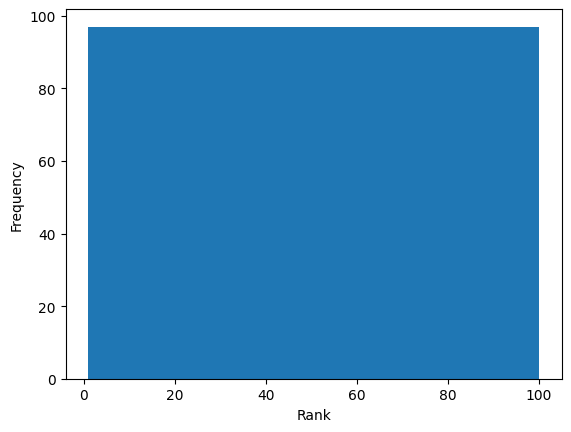

In [26]:
plt.hist(df_billboard['rank'], bins=100)
plt.xlabel("Rank")
plt.ylabel("Frequency")

In [27]:
missing = 0
for index, val in df_billboard['date'].value_counts().items():
    if val < 100:
        missing = missing + (100-val)
        print('date:', index, ', #ranks:', val)
if missing == 0:
    print('No missing ranks!')
else:
    print(missing, 'missing rank entries!')

No missing ranks!


Text(0, 0.5, 'Frequency')

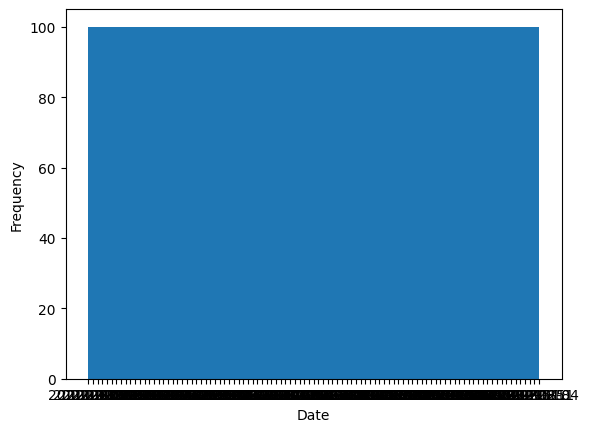

In [28]:
plt.hist(df_billboard['date'], bins=df_billboard['date'].nunique())
plt.xlabel("Date")
plt.ylabel("Frequency")

## USA
First try with USA to get a feel on how to work with the dataset.
We will use USA for further analysations because we can compare it to the Billboard charts

In [29]:
# check for missing dates
checkMissingDates(df_viral50, 'United States', '2020-01-01', '2021-12-31')

No missing dates!


In [30]:
# check for missing ranks
checkMissingRanks(df_viral50, 'United States', 50)

18 missing rank entries!


In [31]:
df_USA50 = df_viral50[df_viral50['region'] == 'United States']
df_USA50.shape

(36532, 11)

Text(0, 0.5, 'Frequency')

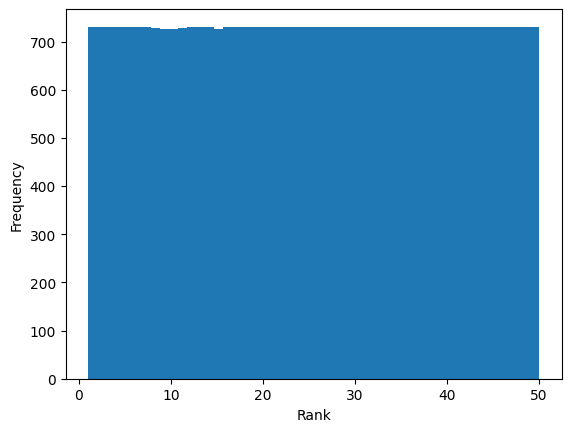

In [32]:
plt.hist(df_USA50['rank'], bins=50)
plt.xlabel("Rank")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

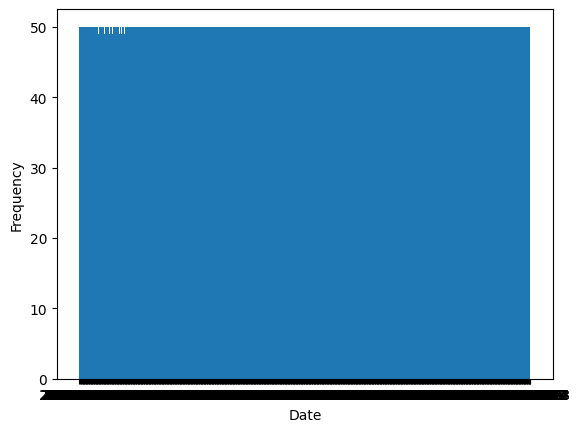

In [33]:
plt.hist(df_USA50['date'], bins=df_USA50['date'].nunique())
plt.xlabel("Date")
plt.ylabel("Frequency")

In [34]:
# check for missing dates
checkMissingDates(df_top200, 'United States', '2020-01-01', '2021-12-31')

2 missing dates!


DatetimeIndex(['2021-12-01', '2021-12-02'], dtype='datetime64[ns]', freq=None)

In [35]:
#check fir missing ranks
checkMissingRanks(df_top200, 'United States', 200)

No missing ranks!


In [36]:
df_USA200 = df_top200[df_top200['region'] == 'United States']
df_USA200.shape

(145800, 11)

Text(0, 0.5, 'Frequency')

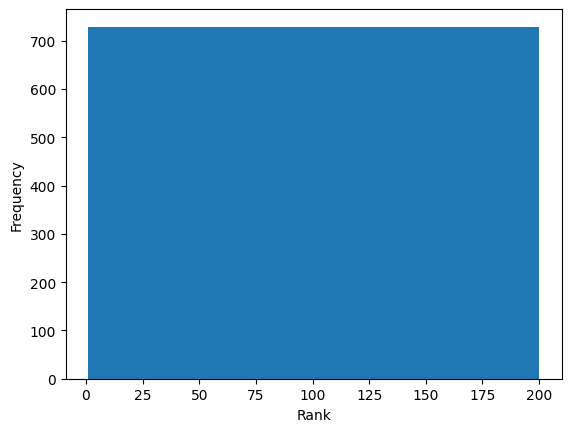

In [37]:
plt.hist(df_USA200['rank'], bins=200)
plt.xlabel("Rank")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

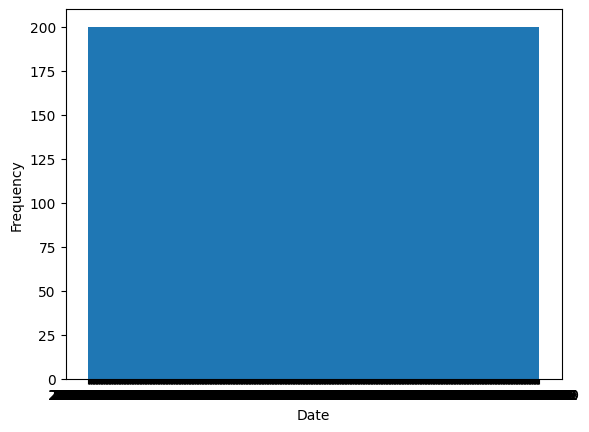

In [38]:
plt.hist(df_USA200['date'], bins=df_USA200['date'].nunique())
plt.xlabel("Date")
plt.ylabel("Frequency")

What could we do to see if the trend impacts the charts?
- we could aggregate the viral charts of 1 week or month to a metric thet describes in wich direction the trend is heding during the week
- to indicate in witch direction the trend of a chart is going we could calculate a score of the changes of position in Viral50 during this week 


Calculation example:
Week(2021-12-11) rank=9, Week(2021-12-18) rank=7

So the trend score of the week 2021-12-11 would be +2

In [39]:
#convert date to datatype datetime
#df_USA50['date'] = df_USA50['date'].astype('datetime64[ns]')

In [40]:
df_USA50.dtypes

Unnamed: 0.1      int64
Unnamed: 0        int64
title            object
rank              int64
date             object
artist           object
url              object
region           object
chart            object
trend            object
streams         float64
dtype: object

Only take Saturday values like in the Billboard charts

In [41]:
satList = pd.date_range(start='2020-01-01', end='2021-11-06', freq = 'W-SAT').astype(str).tolist()
len(satList)

97

In [42]:
df_weekly_USA50 = df_USA50[df_USA50['date'].isin(satList)]
df_weekly_USA50['date'].nunique()

97

In [43]:
for index, val in df_weekly_USA50['date'].value_counts().items():
    if val < 50:
        print('date:', index, ', #ranks:', val)

date: 2021-11-06 , #ranks: 49


In [44]:
# rank 9 is missing for 2021-11-06
df_weekly_USA50[df_weekly_USA50['date'] == '2021-11-06']

,Unnamed: 0.1,Unnamed: 0,title,rank,date,artist,url,region,chart,trend,streams
1574189,1574189,25093798,Paul Chomedey de Mainsoneuve,1,2021-11-06,"Young Ratoo, 2ratoo3",https://open.spotify.com/track/3aOPETAvb6kXr1g...,United States,viral50,SAME_POSITION,NaN
1574190,1574190,25093799,Nuestra Canción,2,2021-11-06,"Monsieur Periné, Vicente Garcia",https://open.spotify.com/track/5reQI13tWWYDLMr...,United States,viral50,SAME_POSITION,NaN
1574191,1574191,25093800,SAD GIRLZ LUV MONEY Remix (feat. Kali Uchis an...,3,2021-11-06,Amaarae,https://open.spotify.com/track/15HMh4yxdf4wyxS...,United States,viral50,SAME_POSITION,NaN
1574192,1574192,25093801,Я буду ебать,4,2021-11-06,"Moreart, IHI",https://open.spotify.com/track/3lFrFQcZWPLa8WE...,United States,viral50,SAME_POSITION,NaN
1574193,1574193,25093802,Want me,5,2021-11-06,Cl4pers,https://open.spotify.com/track/5HLDzMlEaJ3Ex85...,United States,viral50,SAME_POSITION,NaN
1574194,1574194,25093803,Do It To It,6,2021-11-06,"ACRAZE, Cherish",https://open.spotify.com/track/20on25jryn53hWg...,United States,viral50,SAME_POSITION,NaN
1574195,1574195,25093804,Notion,7,2021-11-06,The Rare Occasions,https://open.spotify.com/track/4cHKd6qPMR1TMx5...,United States,viral50,SAME_POSITION,NaN
1574196,1574196,25093805,Better Days (NEIKED x Mae Muller x Polo G),8,2021-11-06,NEIKED,https://open.spotify.com/track/6f5ExP43esnvdKP...,United States,viral50,SAME_POSITION,NaN
1574197,1574197,25093806,WFM,10,2021-11-06,RealestK,https://open.spotify.com/track/18ddJHQ7CUzNBiy...,United States,viral50,SAME_POSITION,NaN
1574198,1574198,25093807,see you later (ten years),11,2021-11-06,Jenna Raine,https://open.spotify.com/track/5elofKuRmgZmCVI...,United States,viral50,SAME_POSITION,NaN


In [45]:
df_weekly_USA50.to_csv('data/spotify_viral50_usa_weekly.csv')

In [46]:
df_weekly_USA200 = df_USA200[df_USA200['date'].isin(satList)]
df_weekly_USA200['date'].nunique()

97

In [47]:
for index, val in df_weekly_USA200['date'].value_counts().items():
    if val < 50:
        print('date:', index, ', #ranks:', val)

In [48]:
df_weekly_USA200.to_csv('data/spotify_top200_usa_weekly.csv')